In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
利用y = w * x + b的模型去回归data.txt
使用穷举法，穷举w
"""

In [2]:
input = np.loadtxt("data.txt",delimiter=',')
print(input)

[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6. 12.]]


In [3]:
# 取第一列
x_data = input[:, 0:1]
# 取最后一列
y_data = input[:, 1:]
n_row = input.shape[0]

print("x_data",x_data)
print("y_data",y_data)

x_data [[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]
y_data [[ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]
 [12.]]


In [5]:
# 以 y = w * x作为模型进行穷举法训练
def forward(w, x):
    return w * x

def loss(y_hat, y):
    return (y_hat - y) * (y_hat - y)


In [28]:
# 穷举0-4
w_range = np.linspace(0, 4, 40)
b_range = np.linspace(-1, 1, 40)
print(w_range)
print(w_range.size)

[0.         0.1025641  0.20512821 0.30769231 0.41025641 0.51282051
 0.61538462 0.71794872 0.82051282 0.92307692 1.02564103 1.12820513
 1.23076923 1.33333333 1.43589744 1.53846154 1.64102564 1.74358974
 1.84615385 1.94871795 2.05128205 2.15384615 2.25641026 2.35897436
 2.46153846 2.56410256 2.66666667 2.76923077 2.87179487 2.97435897
 3.07692308 3.17948718 3.28205128 3.38461538 3.48717949 3.58974359
 3.69230769 3.79487179 3.8974359  4.        ]
40


In [29]:
loss_sum = np.zeros((w_range.size, b_range.size))
for w_index, w_var in enumerate(w_range):
    for b_index, b_var in enumerate(b_range):
        loss_v = 0
        for i in range(n_row):
            y_hat = forward(w_var, x_data[i])
            loss_val = loss(y_hat, y_data[i])
            loss_v = loss_v + loss_val
        loss_sum[w_index][b_index] = loss_v


/var/folders/_s/b1dqc5_97sv5pf5lm7cdg5y80000gn/T/ipykernel_97485/2261665258.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_sum[w_index][b_index] = loss_v


In [30]:
print(w_range.shape)
print(b_range.shape)
print(loss_sum.shape)

(40,)
(40,)
(40, 40)


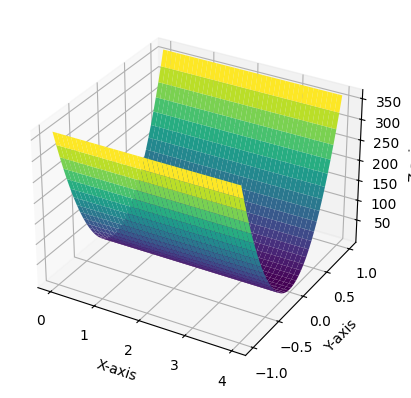

In [31]:
W, B = np.meshgrid(w_range, b_range)


# 创建一个 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面
# 需要保证W，B，loss_sum矩阵size相同
ax.plot_surface(W, B, loss_sum, cmap='viridis')

# 设置坐标轴标签
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 显示图形
plt.show()